In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

In [2]:
## OBTENÇÃO DOS DADOS
colunas = Vizier(columns=['HIP', 'B-V', 'Vmag', 'Plx', 'e_Plx', 'RAhms', 'DEdms'], row_limit = -1)
data = colunas.get_catalogs('I/239/hip_main')[0]
data = data.to_pandas()

In [3]:
data['Mv'] = data['Vmag'] + 5 * np.log10(data['Plx']/100.) #magnitude para filtro V
data['L'] =  10**((4.83 - data['Mv'])*0.4) #Luminosidade
data['Teff'] = 4600*((1/((0.92*data['B-V'])+1.7))+(1/((0.92*data['B-V'])+0.62))) #Temperatura Effetiva

data = data.replace([0,[np.inf],[-np.inf],r'^\s*$'], np.nan, regex=True) #substitui vazios por nan
data = data.dropna() #Limpa os nan

/home/antenor/anaconda3/envs/antenor/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/antenor/anaconda3/envs/antenor/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
## FUNÇÃO MÁSCARA: (ERRO DA PLX) / PLX
def filtro(dados,erro):
    dados['erro'] = dados['e_Plx']/dados['Plx']
    mask = dados['erro'] <= erro
    return dados[mask]

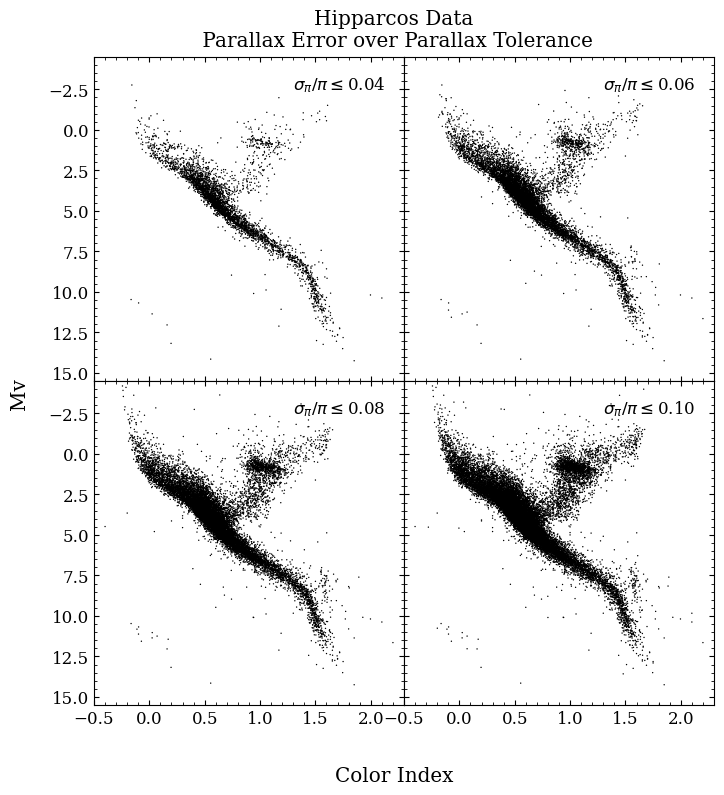

In [5]:
## PLOT DO GRÁFICO
err = [0.04, 0.06, 0.08, 0.10] ## Erros da paralaxe sobre paralaxe a filtar

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True, )
plt.subplots_adjust(wspace=0, hspace=0, top=0.92)

fig.suptitle('Hipparcos Data\n Parallax Error over Parallax Tolerance')
fig.supxlabel('Color Index')
fig.supylabel('Mv')

for i, ax in zip(err, axs.flatten()):
    x = filtro(data, i)['B-V']
    y = filtro(data, i)['Mv']
    ax.scatter(x, y, edgecolors='none', s=1, c='k')
    ax.set_xlim(-0.5, 2.3)
    ax.set_ylim(15.5, -4.5)
    ax.annotate(r'$\sigma_{\pi}/\pi \leq$'+ f'{ "{:.2f}".format(i) }', xy=(1.3, -2.5))

# REFERÊNCIAS
- http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html
- https://astroquery.readthedocs.io/en/latest/vizier/vizier.html
- https://www.cosmos.esa.int/web/hipparcos
- SANDAGE, Allan; LUBIN, Lori M.; VANDENBERG, Don A. The Age of the Oldest Stars in the Local Galactic Disk from Hipparcos Parallaxes of G and K Subgiants1. Publications of the Astronomical Society of the Pacific, v. 115, n. 812, p. 1187, 2003.


